# Computer Assignment #3

## Pyspark and Spotify Data Analysis

- **Ali Hamzehpour 810100129**
- **Mina Shirazi 810100250**
- **Mohammad Amin Yousefi 810100236**

### Summary

In this assignment we learn what PySpark is and what it is used for and then perform some Data Analysis on the Spotify dataset using PySpark.

In [1]:
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

## Warm-up
The dataset 'stocks.csv' contains daily information about the stock market, including opening and closing prices, the highest and lowest prices, and trading volume.

**part1, 2**

In [2]:
import pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dataScience').getOrCreate()
df = spark.read.csv('stocks.csv', header=True, inferSchema=True)
df.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [3]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



**Part 3**
In this code snippet, we're filtering the DataFrame `df` to include only rows where the closing price (`Close`) is less than 500. We used the `filter()` function.

Next, we create a new DataFrame `selected_df` by selecting only the columns "Open", "Close", and "Volume" from the filtered DataFrame. This is done using the `select()` method.


In [4]:
from pyspark.sql.functions import col

filtered_df = df.filter(col("Close") < 500)

selected_df = filtered_df.select("Open", "Close", "Volume")

selected_df.show()


+------------------+------------------+---------+
|              Open|             Close|   Volume|
+------------------+------------------+---------+
|        213.429998|        214.009998|123432400|
|        214.599998|        214.379993|150476200|
|        214.379993|        210.969995|138040000|
|            211.75|            210.58|119282800|
|        210.299994|211.98000499999998|111902700|
|212.79999700000002|210.11000299999998|115557400|
|209.18999499999998|        207.720001|148614900|
|        207.870005|        210.650002|151473000|
|210.11000299999998|            209.43|108223500|
|210.92999500000002|            205.93|148516900|
|        208.330002|        215.039995|182501900|
|        214.910006|            211.73|153038200|
|        212.079994|        208.069996|152038600|
|206.78000600000001|            197.75|220441900|
|202.51000200000001|        203.070002|266424900|
|205.95000100000001|        205.940001|466777500|
|        206.849995|        207.880005|430642100|


**part 4**
In this code snippet, we first filter the DataFrame df to include only rows where the closing price (Close) is less than 200 and the opening price (Open) is greater than 200.

In [5]:
filtered_df = df.filter((col("Close") < 200) & (col("Open") > 200))

selected_df = filtered_df.select("Open", "Close", "Volume")

selected_df.show()

+------------------+----------+---------+
|              Open|     Close|   Volume|
+------------------+----------+---------+
|206.78000600000001|    197.75|220441900|
|        204.930004|199.289995|293375600|
|        201.079996|192.060003|311488100|
+------------------+----------+---------+



**part 5**
In this code snippet, we're adding a new column called "Year" to the DataFrame df, which contains the year extracted from the "Date" column.

In [6]:
from pyspark.sql.functions import year

df = df.withColumn("Year", year("Date"))

df.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|Year|
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|2010|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|2010|
|2010-01-11|212.

**part 6**
In this scope, we calculated the minimum trading volume for each year in the DataFrame df. We achieve this by grouping the DataFrame by the "Year" column using the groupBy() method, and then aggregating the minimum volume for each year using the agg() function.

In [7]:
from pyspark.sql.functions import min


min_volume_by_year = df.groupBy("Year").agg(min("Volume").alias("minVolume"))

min_volume_by_year.show()


+----+---------+
|Year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



**part 7**
In this part, we're updating the DataFrame df by adding a new column called "Month", which represents the month extracted from the "Date" column. 

In [8]:
from pyspark.sql.functions import month

df = df.withColumn("Month", month("Date"))

df.show()


+----------+------------------+------------------+------------------+------------------+---------+------------------+----+-----+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|Year|Month|
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+-----+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|    1|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|    1|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|    1|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|2010|    1|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700

Here, we're computing the maximum low price for each combination of year and month in the DataFrame 

In [9]:
from pyspark.sql.functions import max

max_low_price_by_year_month = df.groupBy("Year", "Month").agg(max("Low").alias("maxLow"))

max_low_price_by_year_month.show()

+----+-----+------------------+
|Year|Month|            maxLow|
+----+-----+------------------+
|2012|   10|        665.550026|
|2010|    7|        260.300003|
|2010|   12|        325.099991|
|2015|    2|        131.169998|
|2014|    4|        589.799988|
|2015|   12|        117.809998|
|2016|    7|            103.68|
|2016|   11|        111.400002|
|2012|    8| 673.5400089999999|
|2013|    2|473.24997699999994|
|2012|    4| 626.0000150000001|
|2012|   12|        585.500023|
|2014|   10|        107.209999|
|2016|    5|             99.25|
|2014|   12|        115.290001|
|2013|    9|        503.479988|
|2013|   10|        525.110016|
|2014|    5|        628.900002|
|2016|    2|         96.650002|
|2013|   12| 566.4100269999999|
+----+-----+------------------+
only showing top 20 rows



**part 8**
In this scope, we compute the mean and standard deviation of the "High" prices in the DataFrame `df` using PySpark. We utilize the `agg()` function along with the `mean()` and `stddev()` functions from `pyspark.sql.functions` to calculate these statistics.

we collect the results using the `collect()` method and extract the values from the resulting Row object. 

In [10]:
from pyspark.sql.functions import mean, stddev

mean_high_price = df.agg(mean("High").alias("MeanHighPrice")).collect()[0]["MeanHighPrice"]
stddev_high_price = df.agg(stddev("High").alias("StdDevHighPrice")).collect()[0]["StdDevHighPrice"]

print("Mean High Price: {:.2f}".format(mean_high_price))
print("Standard Deviation of High Price: {:.2f}".format(stddev_high_price))


Mean High Price: 315.91
Standard Deviation of High Price: 186.90


In the end we use pandas to check our results:

In [11]:
import pandas as pd

df2 = pd.read_csv("stocks.csv")

df2.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1762.000000
mean,313.076311,315.911288,309.828241,312.927066,9.422578e+07,75.001741
std,185.299468,186.898177,183.383917,185.147104,6.020519e+07,28.574930
min,90.000000,90.699997,89.470001,90.279999,1.147590e+07,24.881912
25%,115.222498,116.362499,114.002500,115.190002,4.917478e+07,50.288540
50%,318.230007,320.600008,316.545002,318.240008,8.050385e+07,72.983145
75%,470.880017,478.110008,467.972513,472.592512,1.210816e+08,100.207243
max,702.409988,705.070023,699.569977,702.100021,4.702495e+08,127.966091


## Main Task

### Preprocess

We are given a dataset of songs in Spotify and we are asked to do some investigation on the data and extract some insights. The dataset is given in the form of a `.parquet` file which is a columnar storage format that is optimized for fast data retrieval and reading. First we take a look at the head of the dataset to understand the structure of the data.

In [12]:
import findspark
from pyspark.sql import SparkSession

findspark.init()

spark = SparkSession.builder \
    .appName("Spotify Dataset") \
    .getOrCreate()

df = spark.read.parquet("spotify.parquet")

df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+-----------------+--------------------+------------------+------------------+------------------+-----------+--------------+----+------------+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|     acousticness|    instrumentalness|          liveness|           valence|             tempo|duration_ms|time_signature|year|release_date|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+--------

Now we check the schema of the dataset. We will later investigate each column individually to understand the data better.

In [13]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)



Before that we use `describe` method to get some basic statistics of the dataset.

In [14]:
df.describe().show()

+-------+--------------------+----------+---------------+--------------------+---------------------------+--------------------+-----------------+-------------------+-------------------+-------------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|                  id|      name|          album|            album_id|                    artists|          artist_ids|     track_number|        disc_number|       danceability|             energy|              key|           loudness|               mode|        speechiness|       acousticness|   instrumentalness|           liveness|            valence|             tempo|       duration_ms|    time_signature|              year|      release_date|
+-------+--------------------+----------+---------------+--------------------+----

We check the number of null values in each column. As you can see we have only few null values in the dataset so we can safely drop them.

In [15]:
from pyspark.sql.functions import col, sum

columns = df.columns

null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in columns])

null_counts.show()

+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+--------------+----+------------+
| id|name|album|album_id|artists|artist_ids|track_number|disc_number|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo|duration_ms|time_signature|year|release_date|
+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+--------------+----+------------+
|  0|   3|   11|       0|      0|         0|           0|          0|       0|           0|     0|  0|       0|   0|          0|           0|               0|       0|      0|    0|          0|             0|   0|           0|
+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+-

Next, we remove the duplicated values from the dataset. As you can see we had no duplicated values in the dataset.

`dropDuplicates` only drops the rows that all of its columns are the same with another row. We check if we have any rows that have the same name and album.

In [16]:
before_count = df.count()

df = df.dropDuplicates()

after_count = df.count()

print("Number of duplicates dropped:", before_count - after_count)

Number of duplicates dropped: 0


In [17]:
from pyspark.sql.functions import count


track_counts = df.groupBy("name", "album").agg(count("*").alias("count"))

duplicate_tracks = track_counts.filter(track_counts["count"] > 1)

print("Number of tracks with the same name and album but different IDs:", duplicate_tracks.count())
duplicate_tracks.show()

Number of tracks with the same name and album but different IDs: 11635
+--------------------+--------------------+-----+
|                name|               album|count|
+--------------------+--------------------+-----+
|             Darling|             Darling|    2|
|Flute Quartet in ...|Mozart: Flute Qua...|    2|
|              Fusion|              Fusion|    2|
|Good Man (feat. P...|            Grateful|    2|
|   Love In My Pocket|   Love In My Pocket|    2|
|Mazurka No. 44 in...|Chopin: Mazurkas,...|    2|
|Piano Sonata No. ...|Mozart: Piano Son...|    2|
|         Singularity|         Singularity|    4|
|The Reasons I Lov...|      Yellow Kitchen|    2|
|        Worlds Apart|        Worlds Apart|    3|
|Carmina Burana: C...|Orff: Carmina Burana|    4|
|         Come Around|         Come Around|    3|
|Concerto in D maj...|Telemann/Cto. for...|    2|
|Countdown - Homec...|HOMECOMING: THE L...|    2|
|               DWAY!|             MIRRORS|    2|
|Do You Hear What ...|Do You 

As you can see we have obvious duplications here so we drop those rows that have the same name and album:

In [18]:
deduplicated_df = df.dropDuplicates(subset=["name", "album"])

We define a function called `show_value_counts` to get the counts of each unique value in a column. We will use this function to investigate the columns.

In [19]:
def show_value_counts(df, column_name):
    df.groupBy(column_name).count().orderBy(column_name).show()

Now that we have general idea about the dataset, we can start investigating the columns individually:

* **id**, **name**, **album** and **album_id**: We drop id because it is unique for each song and does not provide any useful information. We keep the name and album columns as they are. We also need album_id because we definitely have albums with the same name but different ids. We will use this column to identify the albums. 
 


In [20]:
df = df.drop("id")

* **track_number**: We check the distribution of the track numbers in the dataset. As you can see the track numbers are between 1 and 20 and as the track number increases the number of songs decreases. This is expected because albums usually have less songs than 20.

We can also notice that We have a few albums with only one song which is interesting to investigate, So we keep this column and we don't drop it. 

In [21]:
show_value_counts(df, "track_number")

+------------+------+
|track_number| count|
+------------+------+
|           1|122840|
|           2|101759|
|           3| 98764|
|           4| 96487|
|           5| 92833|
|           6| 88810|
|           7| 84772|
|           8| 81017|
|           9| 75760|
|          10| 69737|
|          11| 57333|
|          12| 46982|
|          13| 35077|
|          14| 27767|
|          15| 21677|
|          16| 17224|
|          17| 13685|
|          18| 11384|
|          19|  9248|
|          20|  7912|
+------------+------+
only showing top 20 rows



* **disc_number**: We check the distribution of the disc numbers in the dataset. As you can see the disc numbers are between 1 and 13 and most of the tracks are in disc #1.

In [22]:
show_value_counts(df, "disc_number")

+-----------+-------+
|disc_number|  count|
+-----------+-------+
|          1|1150261|
|          2|  44449|
|          3|   6701|
|          4|   1655|
|          5|    625|
|          6|    186|
|          7|     70|
|          8|     33|
|          9|     14|
|         10|     12|
|         11|     15|
|         12|      3|
|         13|      1|
+-----------+-------+



* **explicit**: Whether or not the track has explicit lyrics. We convert this column to an integer column to make it easier to work with.


In [23]:
df = df.withColumn("explicit", col("explicit").cast("int"))

* **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

In [24]:
show_value_counts(df, "key")

+---+------+
|key| count|
+---+------+
|  0|149568|
|  1| 96357|
|  2|144583|
|  3| 39777|
|  4| 97612|
|  5|100006|
|  6| 63502|
|  7|155382|
|  8| 65348|
|  9|133270|
| 10| 77164|
| 11| 81456|
+---+------+



* **loudness**: The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db.

* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [25]:
show_value_counts(df, "mode")

+----+------+
|mode| count|
+----+------+
|   0|395571|
|   1|808454|
+----+------+



* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

* **instrumentalness**: Predicts whether a track contains no vocals. 

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM).

* **duration_ms**: The duration of the track in milliseconds.

We convert duration to minutes to have a better understanding of it:

In [26]:
from pyspark.sql.functions import col

df = df.withColumn("duration_min", col("duration_ms") / 60000.0)

df = df.drop("duration_ms")

We check the number of tracks with duration < 20 seconds and we drop them because they aren't so many and also they might be wrong data.

In [27]:
tracks_less_than_30_sec = df.filter(col("duration_min") < 1 / 3)  

num_tracks_less_than_30_sec = tracks_less_than_30_sec.count()

print("Number of tracks with duration less than 30 seconds:", num_tracks_less_than_30_sec)


Number of tracks with duration less than 30 seconds: 3632


In [28]:
df = df.filter(col("duration_min") >= 1 / 3)  

* **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".



In [29]:
show_value_counts(df, "time_signature")

+--------------+------+
|time_signature| count|
+--------------+------+
|           0.0|   667|
|           1.0| 19293|
|           3.0|162227|
|           4.0|987916|
|           5.0| 30290|
+--------------+------+



* **year**: we check year's unqiue values and we see that we have year 0! Because we only 10 rows with year 0, we drop them.

In [30]:
show_value_counts(df, "year")

+----+-----+
|year|count|
+----+-----+
|   0|   10|
|1900|   14|
|1908|   19|
|1909|   25|
|1917|   52|
|1920|   25|
|1923|   50|
|1924|   36|
|1925|   49|
|1926|  107|
|1927|   48|
|1928|  114|
|1929|   32|
|1930|   59|
|1931|   35|
|1932|   59|
|1933|   63|
|1935|   20|
|1936|   83|
|1937|   39|
+----+-----+
only showing top 20 rows



In [31]:
filtered_df = df.filter(df.year == 0)
filtered_df.show()

+-----------------+----------+--------------------+-----------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+------------------+------------------+--------+------------------+------------------+--------------+----+------------+------------------+
|             name|     album|            album_id|    artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|      acousticness|  instrumentalness|liveness|           valence|             tempo|time_signature|year|release_date|      duration_min|
+-----------------+----------+--------------------+-----------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+------------------+------------------+--------+------------------+------------------+--------------+----+------------+---------------

In [32]:
df = df.filter(df["year"] != 0)

**release_date**: we convert the release date to a datetime object and extract month and day of week from it.

In [33]:
from pyspark.sql.functions import to_date, month, dayofweek

df = df.withColumn("release_date", to_date("release_date"))

df = df.withColumn("release_month", month("release_date"))
df = df.withColumn("release_day_of_week", dayofweek("release_date"))

df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+--------------------+--------------------+------------------+------------------+------------------+--------------+----+------------+------------------+-------------+-------------------+
|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|        acousticness|    instrumentalness|          liveness|           valence|             tempo|time_signature|year|release_date|      duration_min|release_month|release_day_of_week|
+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+--------

* **artist_names** and **artist_ids** are arrays so we need to explode them to get the individual values. We'll store this in a new dataframe so we analyze artists with the new one and analyze the songs with the original one.

First we convert them to array columns because their type is string.


In [34]:
from pyspark.sql.functions import regexp_replace, split

df = df.withColumn("artists", split(regexp_replace(col("artists"), r"[\[\]']", ""), ", ")) \
       .withColumn("artist_ids", split(regexp_replace(col("artist_ids"), r"[\[\]']", ""), ", "))



In [35]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: array (nullable = true)
 |    |-- element: string (containsNull = false)
 |-- artist_ids: array (nullable = true)
 |    |-- element: string (containsNull = false)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: date (nullable = true)
 |-- duration_min: 

As you can see the columns are now arrays. Now we can explode them to get the individual values.

In [36]:
from pyspark.sql.functions import explode, arrays_zip, col

exploded_df = df.withColumn("tmp", arrays_zip("artists", "artist_ids"))\
                .withColumn("tmp", explode("tmp"))\
                .withColumn("artist", col("tmp.artists"))\
                .withColumn("artist_id", col("tmp.artist_ids"))
exploded_df = exploded_df.drop("artists")
exploded_df = exploded_df.drop("artist_ids")
exploded_df = exploded_df.drop("tmp")


In [37]:
exploded_df.show()

+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+--------------------+--------------------+------------------+------------------+------------------+--------------+----+------------+------------------+-------------+-------------------+--------------------+--------------------+
|                name|               album|            album_id|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|        acousticness|    instrumentalness|          liveness|           valence|             tempo|time_signature|year|release_date|      duration_min|release_month|release_day_of_week|              artist|           artist_id|
+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+-------------

The reason we didn't drop artist_ids column is that we have so many artists with the same name but different ids. We illustrate this in the cell below:

In [38]:
from pyspark.sql.functions import countDistinct

artist_counts = exploded_df.groupBy("artist").agg(countDistinct("artist_id").alias("unique_ids"))

artists_with_multiple_ids = artist_counts.filter(artist_counts["unique_ids"] > 1)

print("Number of artists with the same name and Different ID: ", artists_with_multiple_ids.count())
artists_with_multiple_ids.show()

Number of artists with the same name and Different ID:  3057
+----------------+----------+
|          artist|unique_ids|
+----------------+----------+
|    Yann Tiersen|         2|
|    Lamont Smith|         2|
|         Stardom|         2|
|    Joanna Jones|         2|
|   Michael Smith|         2|
|           Greed|         2|
|            Slug|         5|
|         Cedsing|         2|
|           PETER|         3|
|        Chino XL|         2|
|             H2O|         2|
|           Tosca|         2|
|        Harrison|         3|
|      Rob Thomas|         2|
|          Marduk|         2|
|          Sheena|         2|
|          Defari|         2|
|        Penumbra|         2|
|         Peaches|         3|
|Raquel Rodriguez|         2|
+----------------+----------+
only showing top 20 rows



So finally the schema will be like this:

In [39]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: array (nullable = true)
 |    |-- element: string (containsNull = false)
 |-- artist_ids: array (nullable = true)
 |    |-- element: string (containsNull = false)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: date (nullable = true)
 |-- duration_min: 

In [40]:
from pyspark.sql.functions import countDistinct

unique_count = df.agg(countDistinct("artist_ids").alias("UniqueCount")).collect()[0]["UniqueCount"]
unique_year = df.agg(countDistinct("year").alias("UniqueCount")).collect()[0]["UniqueCount"]


print("unique artists:", unique_count)
print("unique year:", unique_year)

unique artists: 166281
unique year: 100


## Analysis

### Distributions

Here we want to visualize the distribution of various musical features in our DataFrame `df`. We specify the features we want to visualize and set the style of the plots. Then, we create subplots and iterate through each feature, plotting its distribution using histograms with kernel density estimation (kde) for better understanding.

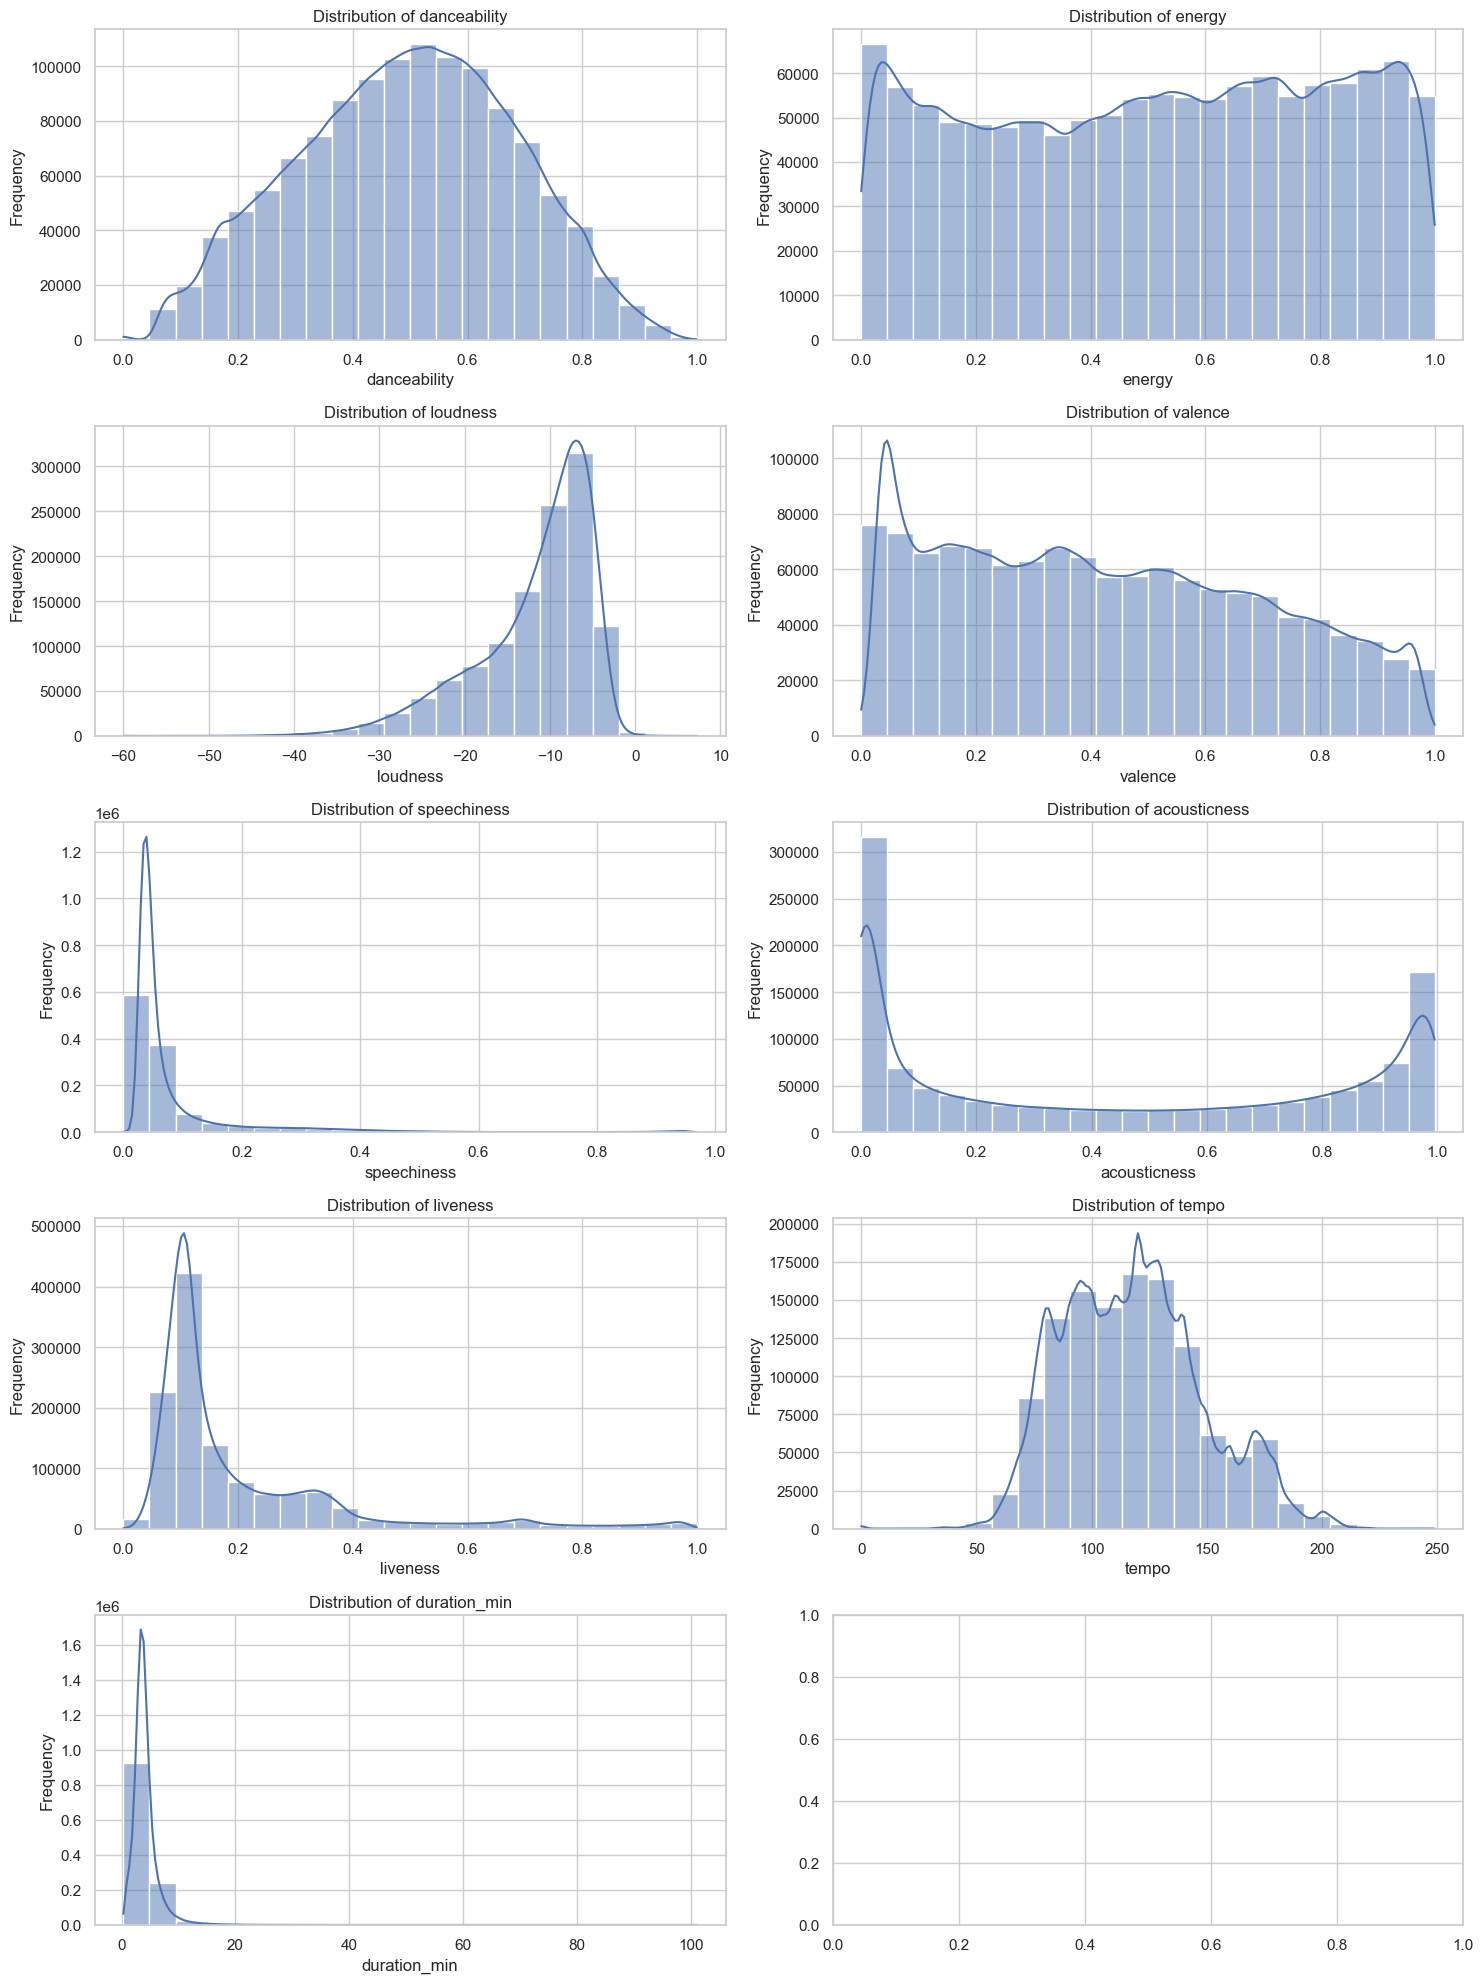

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["danceability", "energy", "loudness", "valence", "speechiness", 
            "acousticness", "liveness", "tempo", "duration_min"]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for i, feature in enumerate(features):
    data = df.select(feature).rdd.flatMap(lambda x: x).collect()
    sns.histplot(data, bins='sturges', kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()

plt.show()


Now we can analyze the distributions:


* **danceability**: The distribution looks normal, so we also plot its qq plot to illustrate how it's close to a normal distribution. 


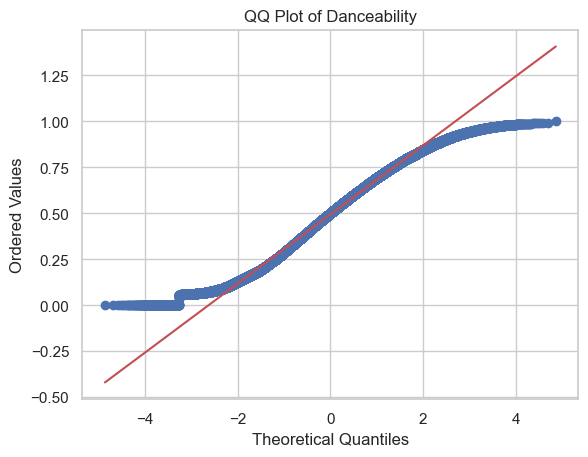

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

danceability_data = df.select("danceability").rdd.flatMap(lambda x: x).collect()

stats.probplot(danceability_data, dist="norm", plot=plt)
plt.title("QQ Plot of Danceability")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

* **energy**: it seems to have a uniform distribution between 0 and 1.
* **loudness**: It has a left-skewed distribution.
* **valence**: It seems that we have more sad songs and the distribution is decreasing.
* **speechiness**: The distribution is right-skewed.
* **acousticness**: The distribution is uniform but we have peaks near 0 and near 1. It could be because they were sure that the track is acoustic or not.
* **liveness**: This is also right-skewed and we have few tracks with liveness > 0.5.
* **tempo**: No comment! 
* **duration**: It's also left-skewed but it's more because we had few tracks with long duration. So we filter them and check the distribution again.

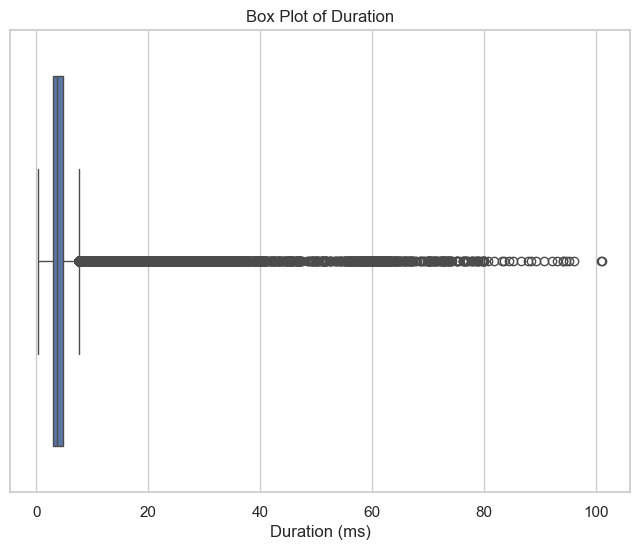

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

duration_values = df.select("duration_min").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(8, 6))
sns.boxplot(x=duration_values, orient="h")
plt.xlabel("Duration (ms)")
plt.title("Box Plot of Duration")
plt.show()


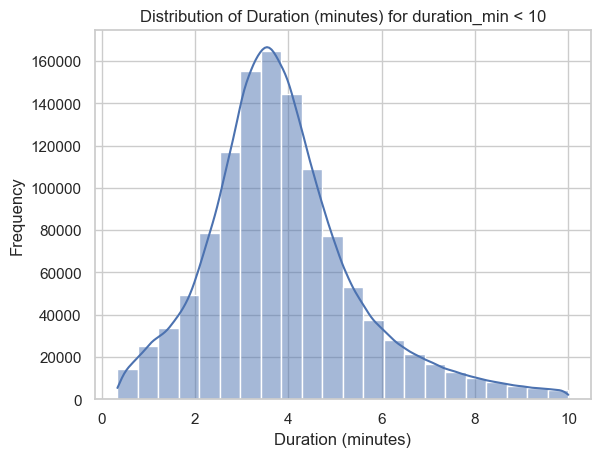

In [44]:
import seaborn as sns

filtered_df = df.filter(df["duration_min"] < 10)

sns.histplot(data=filtered_df.select("duration_min").rdd.flatMap(lambda x: x).collect(), bins='sturges', kde=True)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (minutes) for duration_min < 10')
plt.grid(True)
plt.show()


The distribution is still alittle right-skewed but it gives much better understanding.

We can guess that tracks with high duration are probably podcast or audio books so we compare the average values of speechiness for tracks with duration > 30 minutes and tracks with duration < 30 minutes.

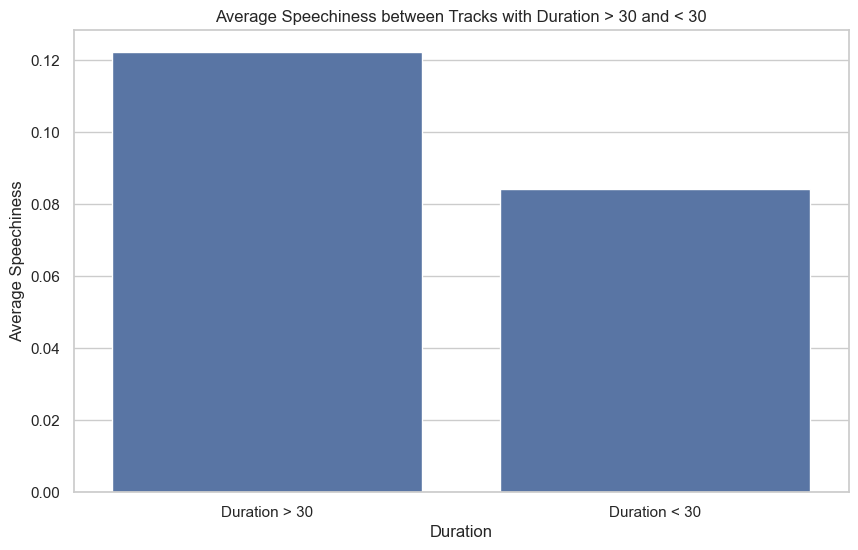

In [84]:
df_gt_30 = df.filter(df.duration_min > 30)
df_lt_30 = df.filter(df.duration_min < 30)

avg_speechiness_gt_30 = df_gt_30.agg({"speechiness": "avg"}).collect()[0][0]
avg_speechiness_lt_30 = df_lt_30.agg({"speechiness": "avg"}).collect()[0][0]

plt.figure(figsize=(10, 6))
sns.barplot(x=["Duration > 30", "Duration < 30"], y=[avg_speechiness_gt_30, avg_speechiness_lt_30])
plt.xlabel("Duration")
plt.ylabel("Average Speechiness")
plt.title("Average Speechiness between Tracks with Duration > 30 and < 30")
plt.show()

### Top 10

In this section we want to show the top 10 artists or tracks based on different features.

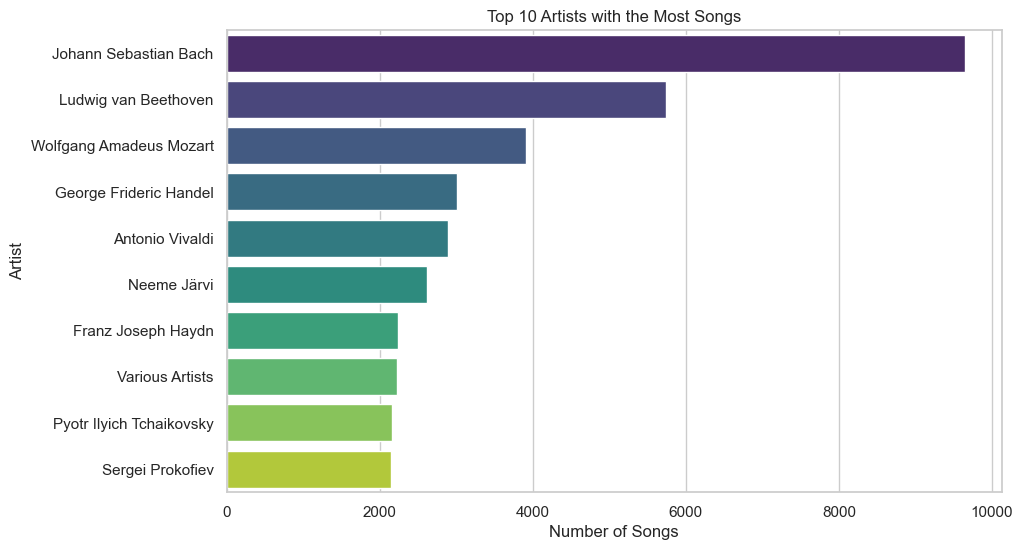

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

artist_counts = exploded_df.groupBy("artist", "artist_id").count()

top_artists = artist_counts.orderBy("count", ascending=False).limit(10).collect()

top_artist_names = [row["artist"] for row in top_artists]
top_artist_counts = [row["count"] for row in top_artists]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artist_counts, y=top_artist_names, hue=top_artist_names, palette="viridis")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.title("Top 10 Artists with the Most Songs")
plt.show()


We then find the top 10 dous which is the combination of two artists that have the most songs together.

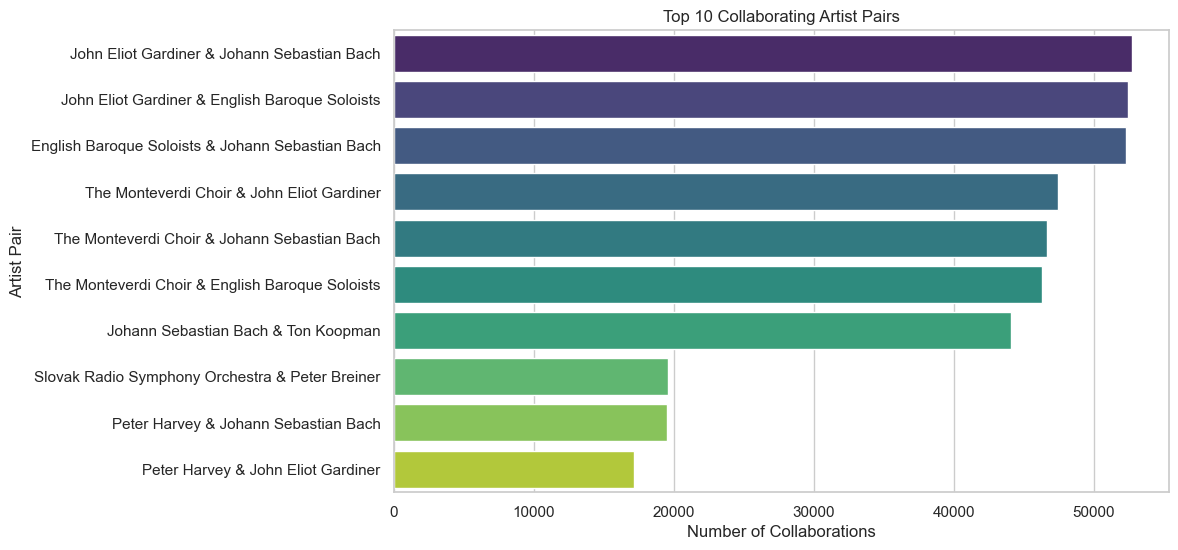

In [94]:
from pyspark.sql.functions import col, count

collaborations_df = exploded_df.alias("df1").join(
    exploded_df.alias("df2"),
    (col("df1.artist_id") < col("df2.artist_id")) & (col("df1.album_id") == col("df2.album_id")),
    "inner"
).select(
    col("df1.artist_id").alias("artist1_id"),
    col("df1.artist").alias("artist1"),
    col("df2.artist_id").alias("artist2_id"),
    col("df2.artist").alias("artist2"),
    col("df1.album_id").alias("album_id")
)

collaboration_counts_df = collaborations_df.groupBy("artist1_id", "artist1", "artist2_id", "artist2").agg(count("album_id").alias("collaboration_count"))

top_collaborating_pairs_df = collaboration_counts_df.orderBy(col("collaboration_count").desc()).limit(10)

pairs = [f"{row['artist1']} & {row['artist2']}" for row in top_collaborating_pairs_df.collect()]
collaboration_counts = [row['collaboration_count'] for row in top_collaborating_pairs_df.collect()]

plt.figure(figsize=(10, 6))
sns.barplot(x=collaboration_counts, y=pairs, hue=pairs, palette="viridis")
plt.xlabel("Number of Collaborations")
plt.ylabel("Artist Pair")
plt.title("Top 10 Collaborating Artist Pairs")
plt.show()

We write a function to show the top 10 artists with lowest or highest values of a given feature.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
def show_top_10_avg(df, col, top=True):
    filtered_df = df.groupBy("artist").count().filter("count >= 10").select("artist")
    df_filtered = df.join(filtered_df, "artist", "inner")
    
    avg_df = df_filtered.groupBy("artist").agg({col: "avg"})
    
    top_avg_df = avg_df.orderBy("avg(" + col + ")", ascending=not top).limit(10).collect()

    top_avg_names = [row["artist"] for row in top_avg_df]
    top_avg_values = [row["avg(" + col + ")"] for row in top_avg_df]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_avg_values, y=top_avg_names, hue=top_avg_names, palette="viridis")
    plt.xlabel("Average " + col)
    plt.ylabel("Artist")
    plt.title(f"Top 10 Artists with the {'Highest' if top else 'Lowest'} Average " + col)
    plt.show()


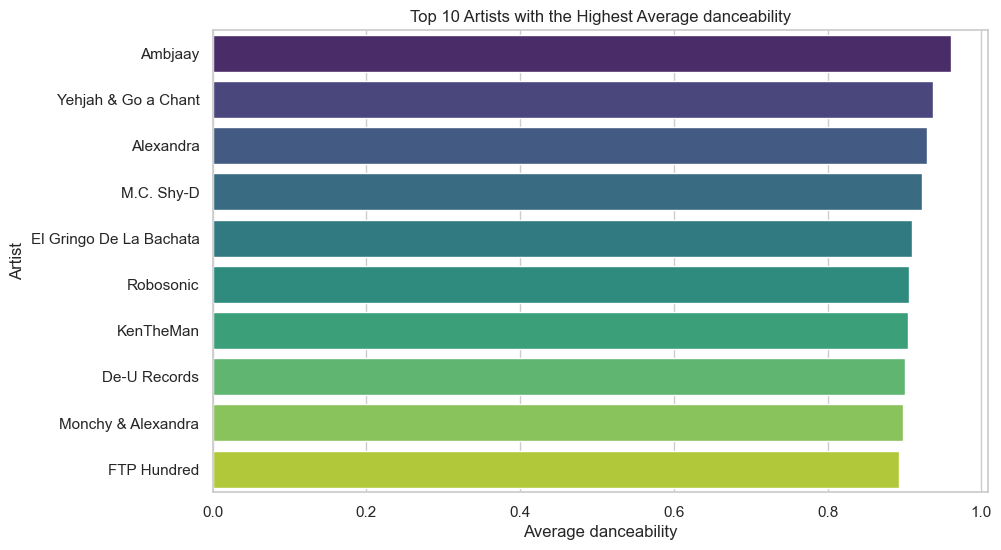

In [47]:
show_top_10_avg(exploded_df, "danceability")

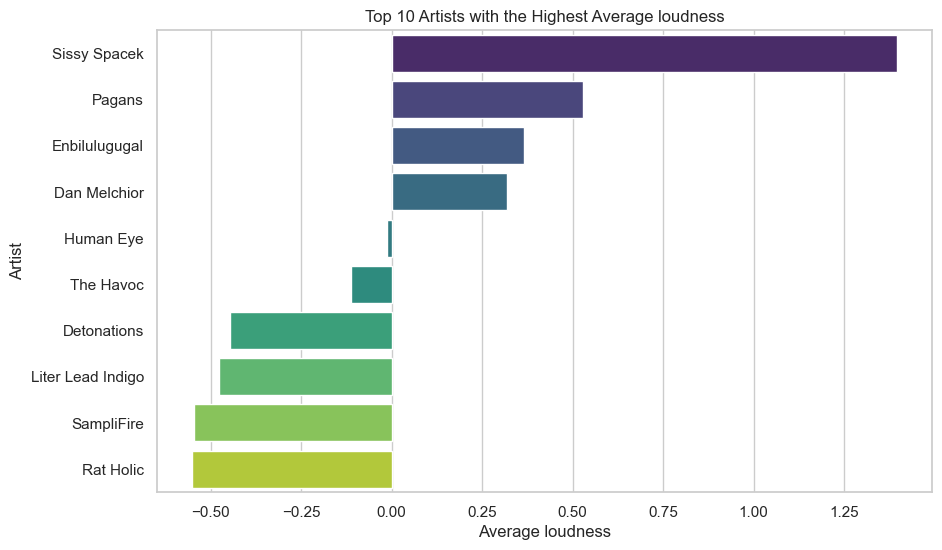

In [48]:
show_top_10_avg(exploded_df, "loudness")

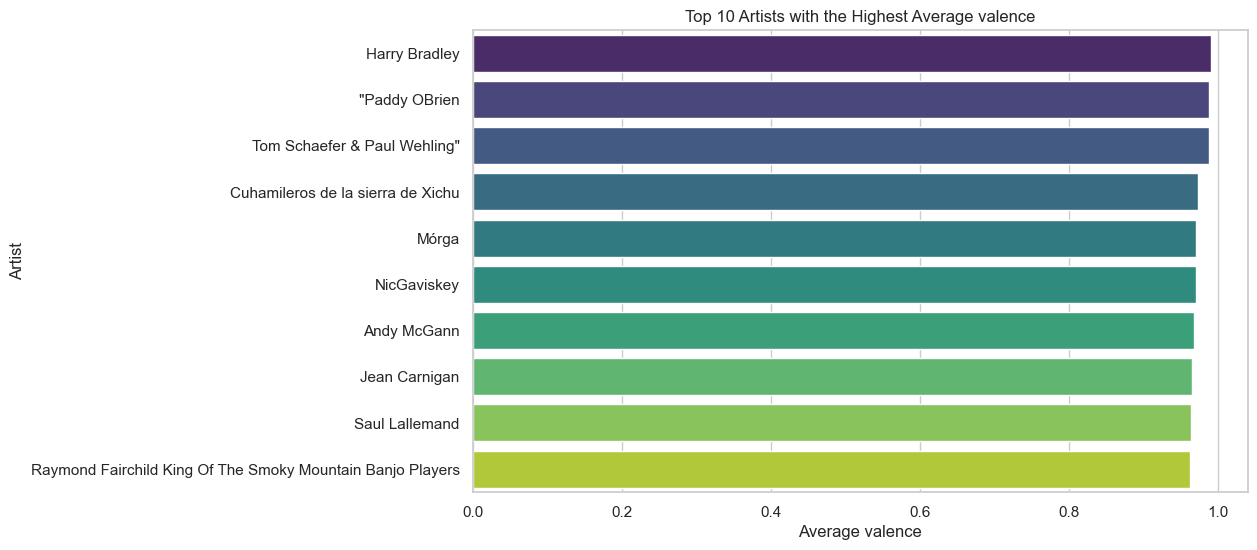

In [49]:
show_top_10_avg(exploded_df, "valence")

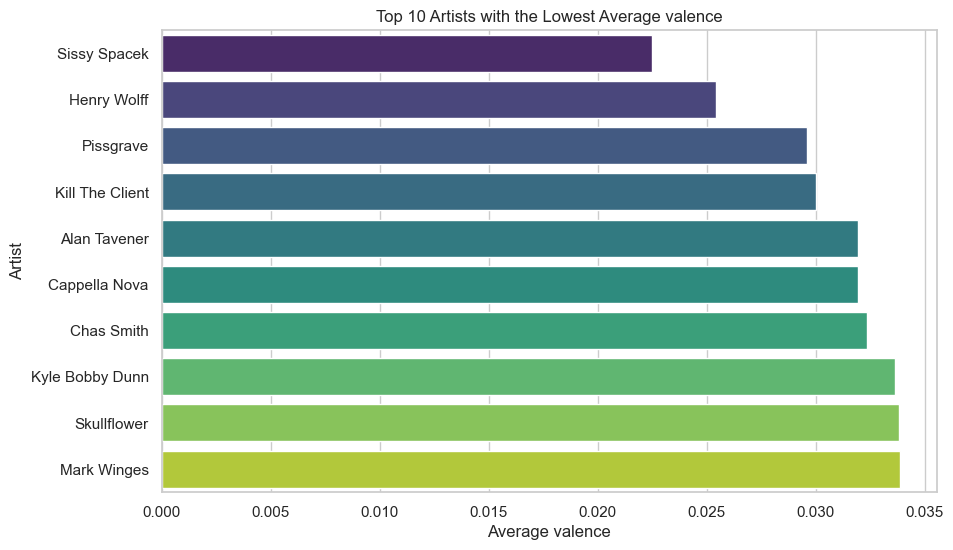

In [50]:
show_top_10_avg(exploded_df, "valence", top=False)

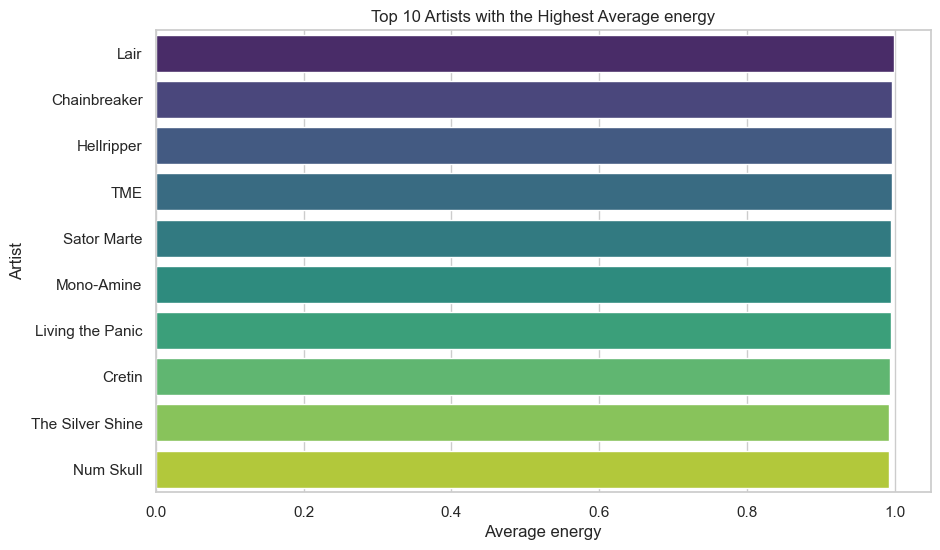

In [51]:
show_top_10_avg(exploded_df, "energy")

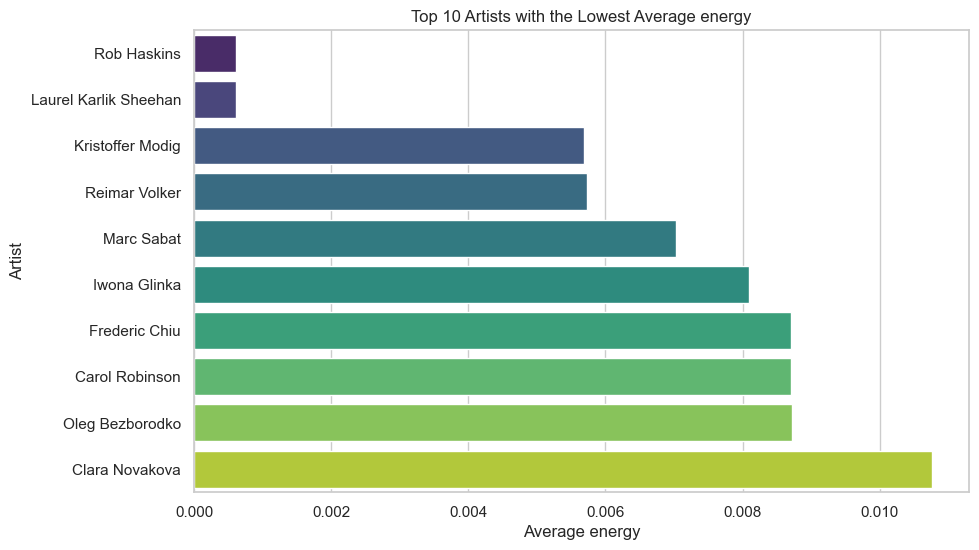

In [52]:
show_top_10_avg(exploded_df, "energy", top=False)

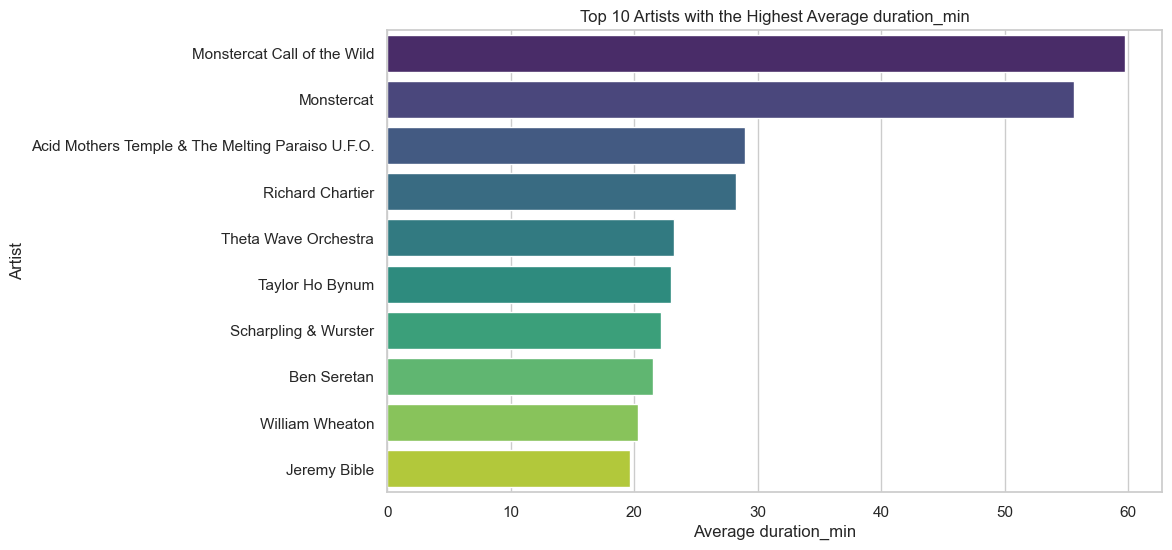

In [53]:
show_top_10_avg(exploded_df, "duration_min")

### Correlation

We imported the necessary libraries for calculating correlations, `seaborn` for visualization. Then, we specified a list of features for which we want to calculate correlations.

Next, we iterated over each pair of features and calculated their correlation using the `corr()` function from PySpark. We stored the correlations in a matrix.

Finally, we created a heatmap using `seaborn` to visualize the correlation matrix.
 The heatmap displays correlations between pairs of features, with annotations showing the correlation coefficients.

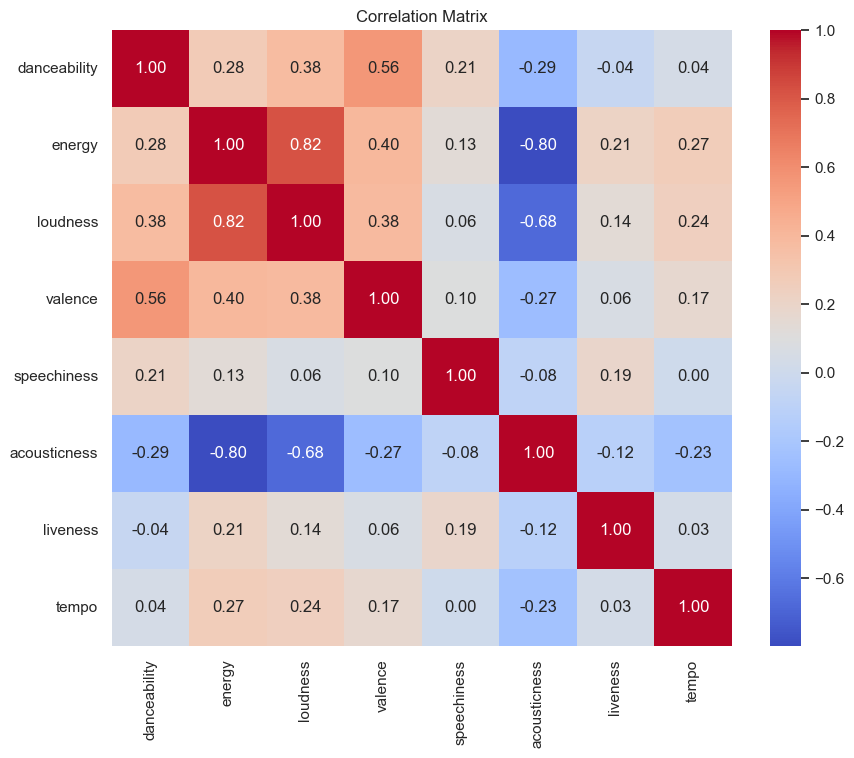

In [54]:
from pyspark.sql.functions import corr
import seaborn as sns
import matplotlib.pyplot as plt

features = ["danceability", "energy", "loudness", "valence", "speechiness", 
            "acousticness", "liveness", "tempo",]

correlation_matrix = []
for feature1 in features:
    row = []
    for feature2 in features:
        correlation = df.select(corr(feature1, feature2)).collect()[0][0]
        row.append(correlation)
    correlation_matrix.append(row)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", xticklabels=features, yticklabels=features, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


* Our analysis of the correlations between various musical features in the dataset reveals several significant relationships.
 We found that songs with higher danceability tend to have slightly higher loudness levels, suggesting a moderate positive correlation between danceability and loudness.

* Additionally, there is a moderately positive correlation between danceability and valence, indicating that songs with higher danceability also tend to convey more positive emotions.

* Moreover, we observed a strong positive correlation between energy and loudness, suggesting that energetic songs tend to be louder. Conversely, energetic songs are less likely to be acoustic, as indicated by a strong negative correlation between energy and acousticness.
   
* Furthermore, there is a moderate positive correlation between energy and valence, suggesting that energetic songs also tend to convey more positive emotions.

* also, we found a strong negative correlation between loudness and acousticness, indicating that louder songs are less likely to be acoustic. 

* Lastly, there is a moderate positive correlation between loudness and valence, suggesting that louder songs also tend to convey more positive emotions.


### Regression

Now that we know there's good correlation between our variables we can use linear regression to predict each of the features with the others.
We use `pyspark.ml` package for this purpose.

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.feature import VectorAssembler, StandardScaler
feature_columns = ["danceability", "energy", "loudness", "valence", "speechiness", 
                   "acousticness", "liveness", "tempo"]
vec_assembler = VectorAssembler(inputCols = feature_columns, 
                                outputCol='features') 
  
final_data = vec_assembler.transform(df) 
  
scaler = StandardScaler(inputCol="features",  
                        outputCol="scaledFeatures",  
                        withStd=True,  
                        withMean=False) 
  
scalerModel = scaler.fit(final_data) 
  
final_data = scalerModel.transform(final_data) 

In [56]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


def plot_regression_results(predictions, target_column):
    predicted_values = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
    actual_values = predictions.select(target_column).rdd.flatMap(lambda x: x).collect()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_values, predicted_values, color='blue', alpha=0.5)
    plt.plot(actual_values, actual_values, color='red', linestyle='--')
    plt.title(f"Regression Results for {target_column}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

for target_column in feature_columns:
    print(f"Linear Regression for {target_column} as the Target Variable:")
    temp_feature_columns = feature_columns.copy()
    temp_feature_columns.remove(target_column)
    vector_assembler = VectorAssembler(inputCols=temp_feature_columns, outputCol="features")
    dataset = vector_assembler.transform(df)
    
    train_data, test_data = dataset.randomSplit([0.8, 0.2], seed=42)
    
    lr = LinearRegression(featuresCol="features", labelCol=target_column)
    
    lr_model = lr.fit(train_data)
    
    predictions = lr_model.transform(test_data)
    
    mse = predictions.selectExpr(f"mean((prediction - {target_column}) * (prediction - {target_column}))").collect()[0][0]
    print(f"Mean Squared Error = {mse:.3f}")
    
    evaluator = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="r2")
    r2_score = evaluator.evaluate(predictions)
    print(f"R-squared Score = {r2_score:.3f}")
    
    coefficients = lr_model.coefficients
    intercept = lr_model.intercept
    
    equation = f"y = {intercept:.3f} + "
    for i, coeff in enumerate(coefficients):
        equation += f"({coeff:.3f} * {temp_feature_columns[i]}) + "
    equation = equation[:-3]
    print(f"Equation: {equation}\n")


Linear Regression for danceability as the Target Variable:
Mean Squared Error = 0.021
R-squared Score = 0.419
Equation: y = 0.677 + (-0.240 * energy) + (0.010 * loudness) + (0.360 * valence) + (0.305 * speechiness) + (-0.108 * acousticness) + (-0.109 * liveness) + (-0.000 * tempo)

Linear Regression for energy as the Target Variable:
Mean Squared Error = 0.017
R-squared Score = 0.808
Equation: y = 0.871 + (-0.193 * danceability) + (0.021 * loudness) + (0.159 * valence) + (0.161 * speechiness) + (-0.339 * acousticness) + (0.109 * liveness) + (0.000 * tempo)

Linear Regression for loudness as the Target Variable:
Mean Squared Error = 14.427
R-squared Score = 0.701
Equation: y = -24.236 + (6.783 * danceability) + (18.059 * energy) + (-0.718 * valence) + (-4.497 * speechiness) + (-0.354 * acousticness) + (-0.172 * liveness) + (0.007 * tempo)

Linear Regression for valence as the Target Variable:
Mean Squared Error = 0.043
R-squared Score = 0.407
Equation: y = -0.344 + (0.756 * danceability

* **Danceability as the Target Variable:**
The features with the most significant coefficients are energy, valence, and speechiness, suggesting that they have the most influence on danceability.

* **Energy as the Target Variable:**
Danceability and acousticness appear to have the most significant impact on energy, based on their coefficients.

* **Loudness as the Target Variable:**
Danceability, energy, and valence seem to be the most influential features in predicting loudness.

* **Valence as the Target Variable:**
Danceability and energy have the highest coefficients, indicating their stronger influence on valence.

* **Speechiness as the Target Variable:**
Danceability and energy have the most significant coefficients, suggesting their stronger association with speechiness.

* **Acousticness as the Target Variable:**
Danceability, energy, and valence appear to be the most influential features in predicting acousticness.

* **Liveness as the Target Variable:**
Speechiness and danceability seem to have the most significant coefficients, indicating their stronger association with liveness.

* **Tempo as the Target Variable:**
Danceability, energy, and valence have the most significant coefficients, suggesting their stronger influence on tempo.

### During Years

In this part we show how a feature chnaged during years. We first declare a function called `show_avg_during_years` which takes a feature and shows how it changed during years.

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_avg_during_years(df, col):
    avg_values_by_year = df.groupBy("year").avg(col).orderBy("year").collect()

    years = [row['year'] for row in avg_values_by_year]
    avg_values = [row[f'avg({col})'] for row in avg_values_by_year]

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=years, y=avg_values, marker="o")
    plt.xlabel("Year")
    plt.ylabel(f"Average {col}")
    plt.xticks(range(1900, 2021, 10))    
    plt.title(f"Average {col} Over the Years")
    plt.show()    

**explicit**: We can see that there's a rise in 1990s. it might be because rap music became more popular in that time and also we have a dramatic rise in explicitness of songs in 2010s!

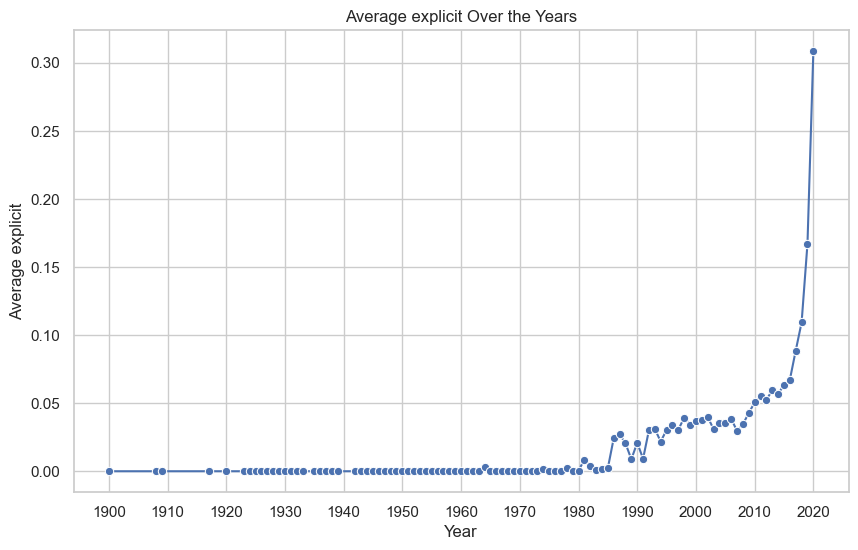

In [62]:
show_avg_during_years(df, "explicit")

**danceability**: As you can see danceability has a fall near 1940, this might be because of the world war II. After that it increases and we have another fall in 1960 but between 1960 and 1980 it's always increasing. In the previous years it's also increasing and we have the highest danceability since 1940!

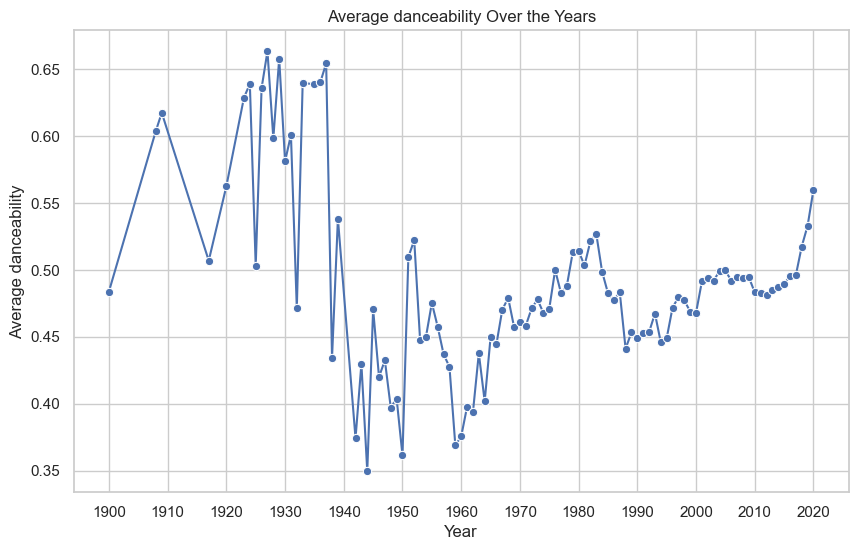

In [63]:
show_avg_during_years(df, "danceability")

**energy**: We still can see the fall in 1940 and the rise between 1960 and 1980. it was decreasing between 1980 and 1990 but after that it's increasing.

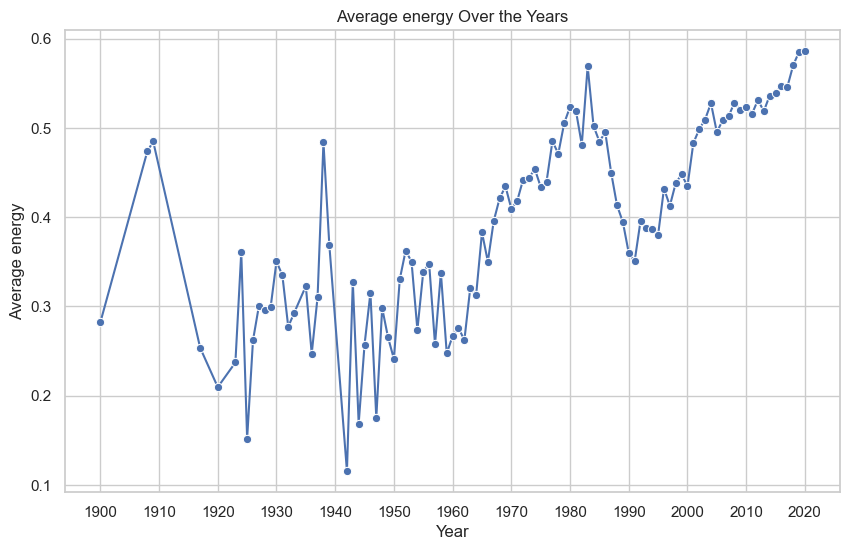

In [64]:
show_avg_during_years(df, "energy")

**acousticness**: The interesting thing is that we have a fall starting from 1960 that might be because of the start of Rock music. We can also see that it's still decreasing in recent years.

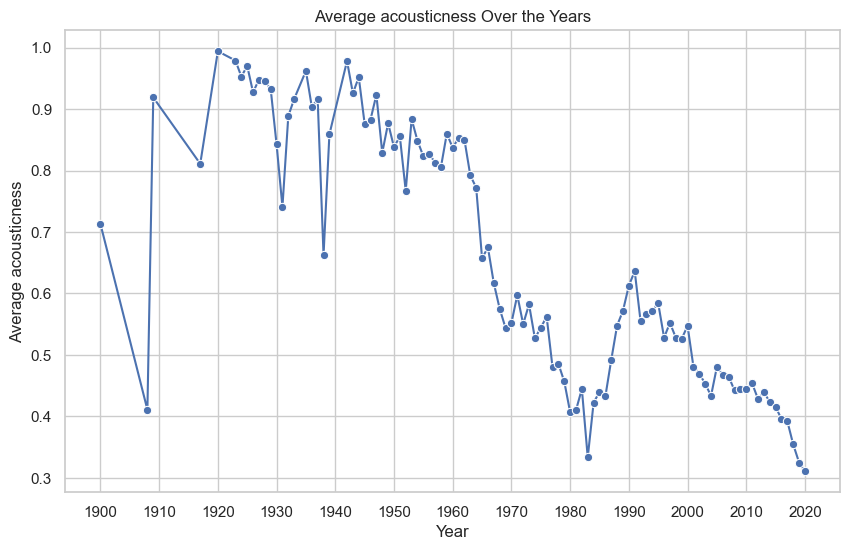

In [69]:
show_avg_during_years(df, "acousticness")

**valence**: We can see that valence has a fall during world war II.

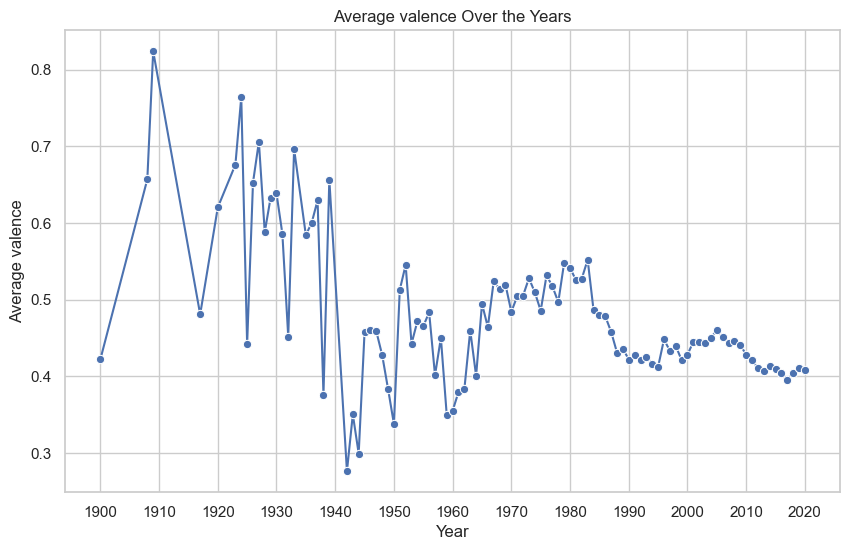

In [68]:
show_avg_during_years(df, "valence")

**durartion**: We can see that the average duration is constant from 1970 to mid 2010 but in the recent years it's decreasing.

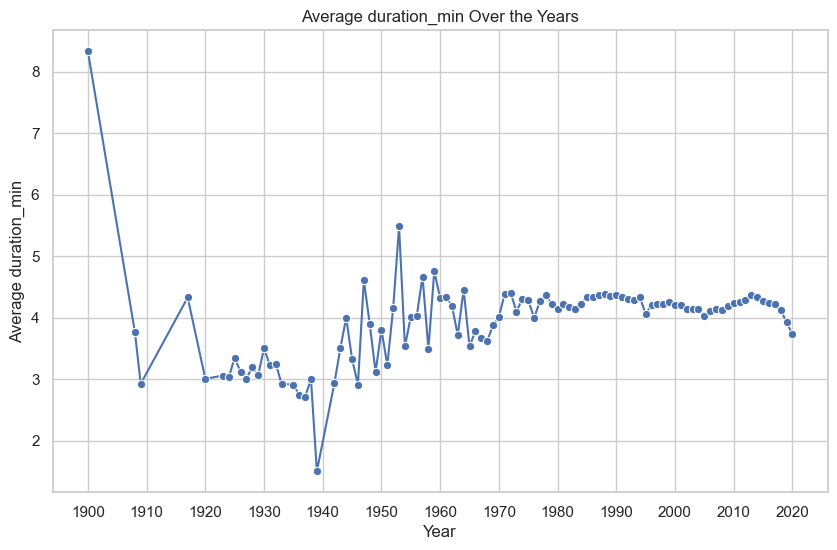

In [70]:
show_avg_during_years(df, "duration_min")

### Month and Day of week

We also check the number of songs published in each day of week and each month.

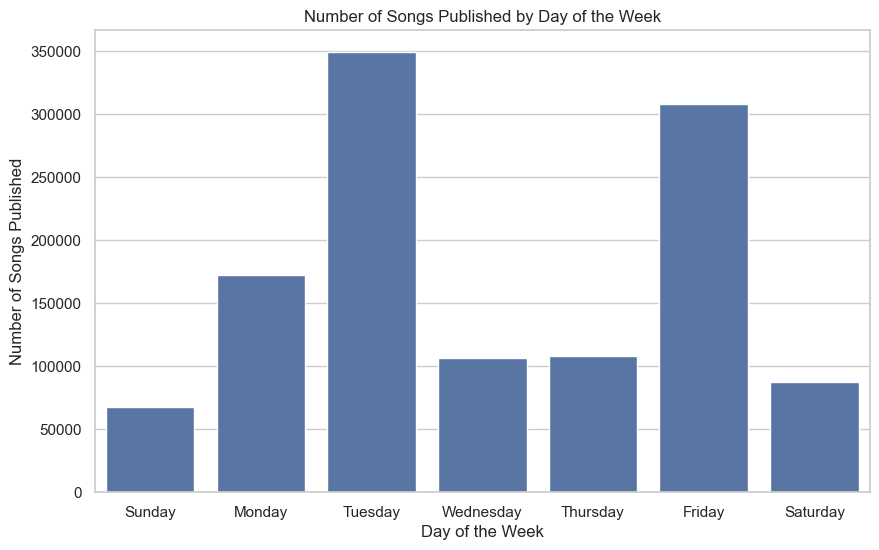

In [74]:
day_names = {1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"}
    
songs_published_by_day_of_week = df.groupBy("release_day_of_week").count().orderBy("release_day_of_week").collect()

days_of_week = [day_names[row["release_day_of_week"]] for row in songs_published_by_day_of_week]
song_counts = [row["count"] for row in songs_published_by_day_of_week]

plt.figure(figsize=(10, 6))
sns.barplot(x=days_of_week, y=song_counts)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Songs Published")
plt.title("Number of Songs Published by Day of the Week")
plt.show()

We can see that most of the songs are published in Friday and tuesday. We seacrhed about this and find the following facts:

* In the United States, Tuesday was traditionally the day for releasing music, but this changed in 2015.
* The primary reason that Friday has become the go-to day for releasing music is because streaming services update their new music catalogs on this day.
* Artists want their songs to be featured on these updated playlists because it increases their chances of having new potential fans.
* Another reason for choosing Friday is that Billboard tracks sales from Friday to Thursday; if an artist releases their song or album on a different day of the week, it won't be tracked for as long and therefore won't have as much chance of success.
* Although Friday has become the industry standard, some artists are beginning to experiment with release strategies outside of this tradition.

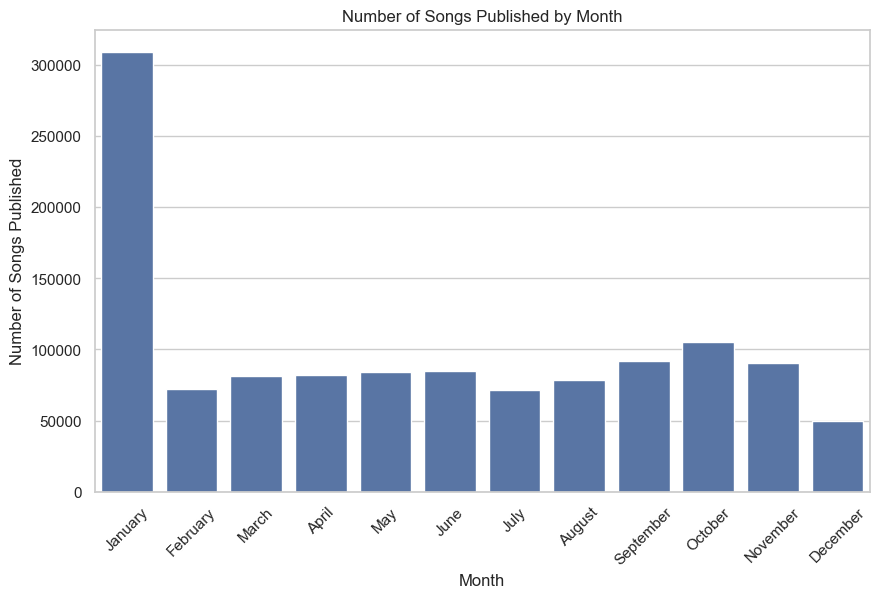

In [82]:
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
    
songs_published_by_month = df.groupBy("release_month").count().orderBy("release_month").collect()

months = [month_names[row["release_month"]] for row in songs_published_by_month]
song_counts = [row["count"] for row in songs_published_by_month]

plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=song_counts)
plt.xlabel("Month")
plt.ylabel("Number of Songs Published")
plt.title("Number of Songs Published by Month")
plt.xticks(rotation=45)
plt.show()

We can see that we have a huge peak in January but this might be because some song release dates are not accurate. If we check the number of songs that are released in 1st of Januray we can see that it's a huge number and they probably didn't know the exact release date of some tracks.

In [87]:
from pyspark.sql.functions import dayofmonth

songs_released_on_1_1 = df.filter((dayofmonth("release_date") == 1) & (month("release_date") == 1))

num_songs_released_on_1_1 = songs_released_on_1_1.count()

print(f"Number of songs released on January 1st: {num_songs_released_on_1_1}")

Number of songs released on January 1st: 252294


### Clustering

Inertia for k = 2 is 6778156.756699981
Inertia for k = 3 is 5970530.593489564
Inertia for k = 4 is 5499113.635896351
Inertia for k = 5 is 4788851.1829842115
Inertia for k = 6 is 4569948.101763979
Inertia for k = 7 is 4424199.993789985
Inertia for k = 8 is 3812351.515400232
Inertia for k = 9 is 3645662.2693961337
Inertia for k = 10 is 3419943.113394934
Inertia for k = 11 is 3286521.0773106636
Inertia for k = 12 is 3256497.744828687
Inertia for k = 13 is 3244048.1242244234
Inertia for k = 14 is 3034089.574173473
Inertia for k = 15 is 2984845.46855723
Inertia for k = 16 is 2975813.8495776756
Inertia for k = 17 is 2884809.8755457406
Inertia for k = 18 is 2746213.058150935
Inertia for k = 19 is 2739469.884085709


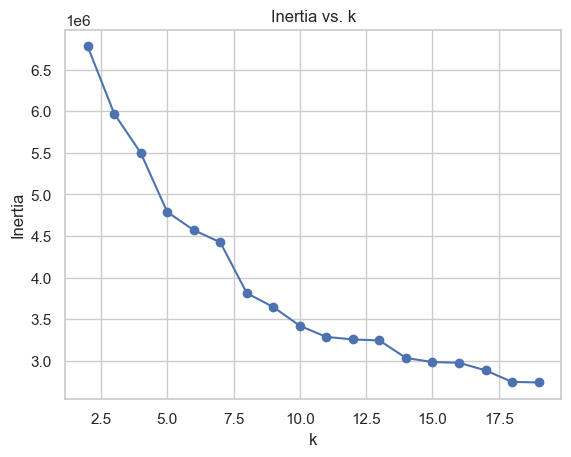

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler

feature_columns = ["danceability", "energy", "loudness", "valence", "speechiness", 
                   "acousticness", "liveness", "tempo"]

vec_assembler = VectorAssembler(inputCols=feature_columns, outputCol='features') 
final_data = vec_assembler.transform(df) 

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False) 
scalerModel = scaler.fit(final_data) 
final_data = scalerModel.transform(final_data)

inertia = []

for i in range(2, 20):
    kmeans = KMeans(featuresCol='scaledFeatures', k=i)
    model = kmeans.fit(final_data)
    inertia.append(model.summary.trainingCost)
    print('Inertia for k =',i,'is',model.summary.trainingCost)

plt.plot(range(2, 20), inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Inertia vs. k')
plt.show()

## Questions

### 1.Read about how Spark and Hadoop work. What does the term ‘lazy evaluation’ meanfor them? Explain with a simple example.

**Spark and Hadoop**

Hadoop is a distributed system that employs HDFS for storing data and MapReduce for handling batch processing, which involves splitting tasks into map and reduce stages across multiple machines. In contrast, Spark is another distributed framework that utilizes RDDs for data manipulation, built upon Spark Core and supplemented by libraries catering to SQL, streaming, machine learning, and graph analysis. Spark's strength lies in its swift and adaptable nature, enabled by its ability to process data in-memory, making it suitable for various tasks including interactive, iterative, and real-time processing, whereas Hadoop's focus remains on batch processing through MapReduce.

**Lazy evaluation**

Lazy evaluation in Spark means that transformations on data are not executed immediately when defined. Instead, Spark builds a plan of these transformations, only executing them when an action requires a result. This delay in execution allows Spark to optimize the processing of data. For instance, consider defining transformations like `map` and `filter` on a dataset. Spark won't actually apply these transformations until an action like `collect()` is invoked, enabling efficient processing.

A simple example for lazy->we have a text file containing numbers, and we want to perform a series of transformations on these numbers using Spark:

1. **Read the text file**: We start by loading the text file into an RDD.
2. **Filter even numbers**: We apply a filter transformation to keep only the even numbers.
3. **Square the numbers**: We map each number to its square.
4. **Sum the squared numbers**: Finally, we calculate the sum of the squared numbers.

### 2.Your main task’s dataset has about 1,200,000 rows, which makes it quite hard, and even sometimes impossible, to work with. Explain how parquet files try to solve this problem, compared to normal file formats like csv.

Parquet file format is a columnar storage format, which means that data for each column is stored together. The storage mechanism enables better compression and typically results in smaller file sizes compared to row-based formats. CSV is a row-based format, where each row is represented as a separate line in the file.In addition,Parquet files are smaller than CSV files, and they can be read and written much faster. Parquet files also support nested data structures, which makes them ideal for storing complex data. CSV: CSV is a row-based data format that is simple to read and write.

### 3.As you might have noticed, Spark doesn’t save checkpoints. How can we enforce it to do so? This can help us if we have multiple computation steps and we don’t want to wait a lot for the result.

Basically, we will use a checkpoint if we want to freeze the content of the dataframe before  do something else.
Apache Spark offers two distinct techniques for increasing performance:

·   Caching, through cache() or persist(), which can save your data and the data lineage.
·   Checkpointing, through checkpoint(), to save your data, without the lineage.

Enabling checkpointing in Apache Spark can be beneficial in scenarios where you have a long chain of transformations or iterative computations, as it helps to truncate the lineage graph, reducing the amount of data that needs to be recomputed in case of failure and improving fault tolerance. To enforce Spark to save checkpoints, we can utilize the `checkpoint()` method. This method enables us to specify a location in the filesystem where Spark will save the checkpoint data. By employing checkpoints, we can mitigate the need to recompute the entire lineage in case of failures, thus reducing the waiting time for the result, especially in scenarios with multiple computation steps.

Here's how we can enforce Spark to save checkpoints:

```python
sc.setCheckpointDir("hdfs://path/to/checkpoint/directory")

data = sc.parallelize([1, 2, 3, 4, 5])
mapped_data = data.map(lambda x: x * 2)
filtered_data = mapped_data.filter(lambda x: x > 5)

filtered_data.checkpoint()
result = filtered_data.collect()
```

In this example, `setCheckpointDir()` is used to specify the directory where Spark will save checkpoint data. After defining our computation steps, we can call `checkpoint()` on an RDD to enforce Spark to save its current state. This can be particularly useful when we have long computation chains and want to minimize the computation time in case of failures or when we need to reuse intermediate results.

### 4. Top companies stream their data on a regular routine, e.g. daily. How can we save data, so that we could filter it based on specific columns, e.g. date, faster than regular filtering?

1. **Partitioning:**
   - Partitioning the data based on the column you want to filter on (e.g., date) can significantly improve query performance.
   - For example, if you are storing data in a distributed file system like Hadoop Distributed File System (HDFS) or cloud storage like Amazon S3, you can partition your data into directories based on date.
   - This allows the system to only read data from the specific partitions that match the filter condition, reducing the amount of data scanned and improving query performance.

2. **Indexing:**
   - Create indexes on the columns that you frequently use for filtering.
   - In traditional databases, indexes can speed up query performance by allowing the database to quickly locate rows that match the filter condition.
   - For streaming data stored in distributed file systems, you may need to use specialized indexing techniques or external indexing systems.
   Here's a simple example of how indexing might be implemented in SQL:
   CREATE INDEX idx_date ON your_table_name (date_column);

3. **Columnar Storage:**
   - Store the data in a columnar format rather than row-wise.
   - Columnar storage stores each column of data separately, which can improve query performance for analytical workloads by only reading the columns needed for the query.
   - Many distributed file systems and data processing frameworks support columnar storage formats like Apache Parquet and Apache ORC.

4. **Caching:**
   - Cache frequently accessed or filtered data in memory to reduce the need for repeated scans of the underlying data.
   - This can be implemented using in-memory data stores like Apache Ignite, Redis, or Memcached.

5. **Pre-aggregation:**
   - Pre-aggregate the data based on commonly used filter criteria.
   - For example, if you frequently filter data by date and aggregate some metrics (e.g., daily sales), you can pre-compute these aggregations and store them separately.
   - This reduces the amount of data that needs to be processed during query execution.

6. **Use of Data Warehouses or Data Lakes:**
   - Data warehouses and data lakes are designed to efficiently store and query large volumes of structured and unstructured data.
   - They often provide built-in optimizations for filtering and querying data, such as partitioning, indexing, and columnar storage.

### 5. Let's face off Pandas and PySpark in the data analysis arena! When does each library truly shine, and why? Consider factors like data size, processing complexity, and user experience.

Pandas and PySpark are both powerful tools for data analysis, but they have different strengths and are suitable for different scenarios.

1. Data Size:
   - Pandas:
     - Pandas is more suitable for small to medium-sized datasets that can fit into memory.
     - It loads the entire dataset into memory, which can limit its scalability for large datasets.
   - PySpark:
     - PySpark is designed to handle large-scale datasets that are distributed across a cluster.
     - It can efficiently process data that exceeds the memory capacity of a single machine by leveraging distributed computing.

2. Processing Complexity:
   - Pandas:
     - Pandas provides a rich set of data manipulation and analysis functions, making it ideal for complex data transformations and exploratory data analysis (EDA).
     - It offers a user-friendly API and is well-suited for interactive data exploration and experimentation.
   - PySpark:
     - PySpark excels at processing complex data transformations and running large-scale analytics tasks.
     - It leverages the power of distributed computing to handle complex data processing tasks efficiently.

3. User Experience:
   - Pandas:
     - Pandas is known for its intuitive and user-friendly API, making it easy for users to perform data analysis and manipulation tasks.
     - It provides descriptive function names and follows a similar syntax to Python's built-in data structures like lists and dictionaries.
   - PySpark:
     - PySpark's API is based on the Spark framework, which may have a steeper learning curve compared to Pandas, especially for users new to distributed computing.
     - However, PySpark provides a familiar DataFrame API similar to Pandas, which can ease the transition for users familiar with Pandas.

- Pandas shines when working with small to medium-sized datasets that fit into memory, performing complex data manipulations and analysis interactively, and providing a user-friendly experience.
- PySpark shines when dealing with large-scale datasets distributed across a cluster, handling complex data processing tasks efficiently, and leveraging distributed computing capabilities.